# Similarity on Time Series: Dynamic Time Warping (DTW)

When working with time series data, such as power consumption or product demand, one may find useful a tool to tell how alike time series are (for example from two factories). Just as when working with tabular data, we have many distance functions at our disposal

## Basic Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc # For nice colorpalettes
colors = cc.glasbey

## Data construction

In [22]:
# Wave sizes
n_x = 20
n_y = 10

# Construct wave data
x = np.cos((n_y/n_x)*np.array(range(n_x)))
y = np.cos(range(n_y))

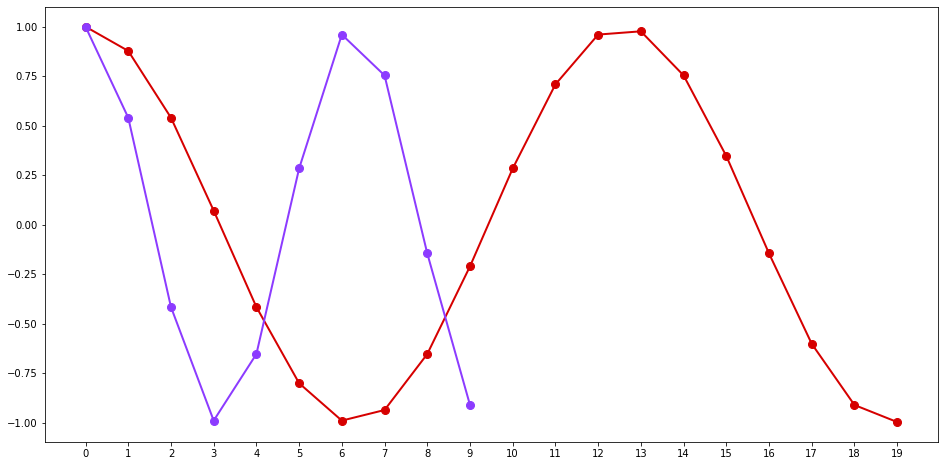

In [26]:
# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot series
ax.set_xticks(np.arange(0, 20, 1))
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])

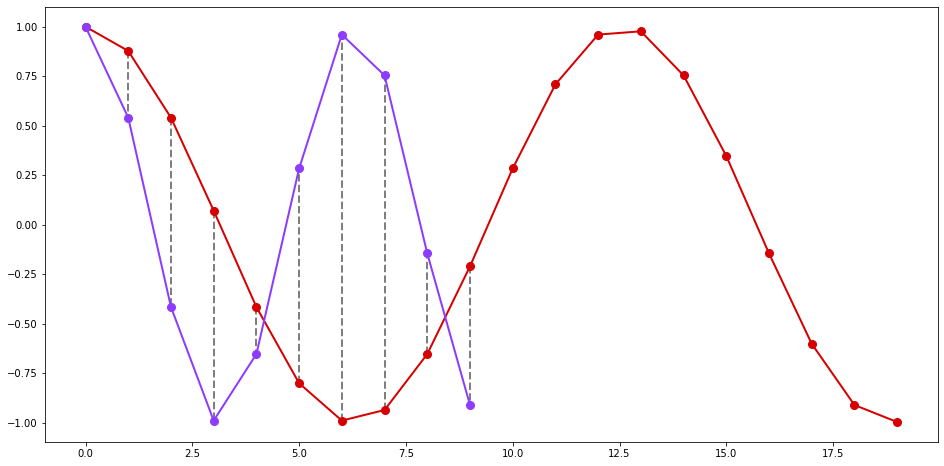

In [25]:
straight_path = list(zip(range(n_x), range(n_y)))

# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot connections
for [map_x, map_y] in straight_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=2, alpha=.5)

# Plot series
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])

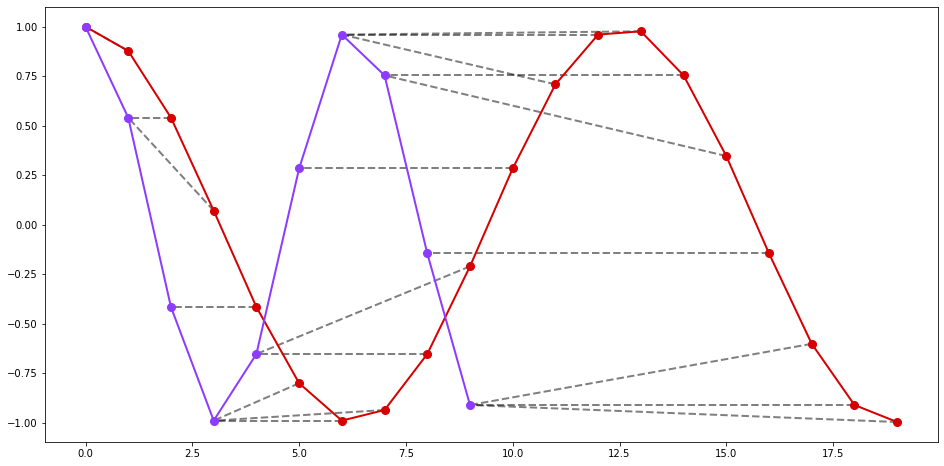

In [24]:
from tslearn.metrics import dtw_path # DTW implementation

optimal_path = dtw_path(x,y)[0] # Find optimal set of connections

# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot connections
for [map_x, map_y] in optimal_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=2, alpha=.5)

# Plot figures
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])

> Disclaimer: TSLearn doesn't implement the full euclidean distance, instead it uses the squared version of it. While this may have implications on some applications, in general, this distance will work pretty well.